In [5]:
import pandas as pd
import numpy as np
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import boxcox
from scipy import stats
%matplotlib inline
cf.go_offline()
pd.set_option('max_columns' , 999)
pd.set_option('max_rows' , 999)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [28]:
df = pd.read_csv('movie_preprocessing.csv',encoding ='CP949')

In [29]:
df = df.set_index("영화명", drop=True)
df.head(1)

,D+13 휴일수,D+7 휴일수,D-1 시사회수,D-5 시사회수,day,month,naver_not_wanna_see,naver_ratio,naver_wanna_see,naver_리뷰수,runtime,weekday,year,감독,국산,대표국적,등급,미국산,배급사,배우,수입사,영화구분,장르,제작사,D-1 누적매출액,D-1 누적관객수,D-5 누적매출액,D-5 누적관객수,D+1 누적매출액,D+1 누적관객수,D+7 누적관객수,D+13 누적관객수,D-1 상영횟수 합,D-1 스크린수 합,D-1 좌석수 합,D-5 상영횟수 합,D-5 스크린수 합,D-5 좌석수 합,D+1 상영횟수 합,D+1 순위 합,D+1 스크린수 합,D+1 좌석수 합,D-5 상영횟수 평균,D-1 상영횟수 평균,D+1 상영횟수 평균,D-5 순위 평균,D-1 순위 평균,D+1 순위 평균,D-5 스크린수 평균,D-1 스크린수 평균,D+1 스크린수 평균,D-5 좌석수 평균,D-1 좌석수 평균,D+1 좌석수 평균,D-5 관객수 평균,D-1 관객수 평균,D+1 관객수 평균,D-5 매출액 평균,D-1 매출액 평균,D+1 매출액 평균,after2_before28_tweet,after2_before28_like,before4_before34_tweet,before4_before34_like,top500_actors,top500_director,배우점수,감독점수,배급사점수,D-5 naver_news,D+1 naver_news
영화명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
명량,4.0,2.0,9.0,6.0,30,7,1126,0.923739,13639,1676,128.0,2.0,2014,['김한민'],1,한국,15세이상관람가,0,['씨제이이앤엠(주)'],"['최민식', '류승룡', '조진웅']",NaN,1,['사극'],['(주)빅스톤픽쳐스'],172231000.0,22500.0,81803000.0,10050.0,1.012452e+10,1410271.0,7329679.0,11775978.0,163.0,145.0,30887.0,87.0,74.0,16924.0,12405.0,2.0,2361.0,2328207.0,14.5,18.111111,6202.5,15.166667,14.0,1.0,12.333333,16.111111,1180.5,2820.666667,3431.888889,1164103.5,1675.0,2500.0,705135.5,1.363383e+07,1.913678e+07,5.062260e+09,6593.0,4713.0,5066.0,4464.0,3,1,47.90913,9.114424,98.955292,3633.0,4358.0


 #  nan값 처리

In [30]:
df.isnull().sum()[lambda x: x>0]

D-1 시사회수         2
D-5 시사회수         2
naver_ratio     71
runtime          1
수입사            314
제작사            767
D-5 상영횟수 평균      2
D-1 상영횟수 평균      2
D-5 순위 평균        2
D-1 순위 평균        2
D-5 스크린수 평균      2
D-1 스크린수 평균      2
D-5 좌석수 평균       2
D-1 좌석수 평균       2
D-5 관객수 평균       2
D-1 관객수 평균       2
D-5 매출액 평균       2
D-1 매출액 평균       2
dtype: int64

In [31]:
df[df["D-1 시사회수"].isnull()]

,D+13 휴일수,D+7 휴일수,D-1 시사회수,D-5 시사회수,day,month,naver_not_wanna_see,naver_ratio,naver_wanna_see,naver_리뷰수,runtime,weekday,year,감독,국산,대표국적,등급,미국산,배급사,배우,수입사,영화구분,장르,제작사,D-1 누적매출액,D-1 누적관객수,D-5 누적매출액,D-5 누적관객수,D+1 누적매출액,D+1 누적관객수,D+7 누적관객수,D+13 누적관객수,D-1 상영횟수 합,D-1 스크린수 합,D-1 좌석수 합,D-5 상영횟수 합,D-5 스크린수 합,D-5 좌석수 합,D+1 상영횟수 합,D+1 순위 합,D+1 스크린수 합,D+1 좌석수 합,D-5 상영횟수 평균,D-1 상영횟수 평균,D+1 상영횟수 평균,D-5 순위 평균,D-1 순위 평균,D+1 순위 평균,D-5 스크린수 평균,D-1 스크린수 평균,D+1 스크린수 평균,D-5 좌석수 평균,D-1 좌석수 평균,D+1 좌석수 평균,D-5 관객수 평균,D-1 관객수 평균,D+1 관객수 평균,D-5 매출액 평균,D-1 매출액 평균,D+1 매출액 평균,after2_before28_tweet,after2_before28_like,before4_before34_tweet,before4_before34_like,top500_actors,top500_director,배우점수,감독점수,배급사점수,D-5 naver_news,D+1 naver_news
영화명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
하이 스피드! ?프리! 스타팅 데이즈-,4.0,2.0,NaN,NaN,24,3,34,0.977528,1479,63,111.0,3.0,2016,['타케모토 야스히로'],0,일본,전체관람가,0,['(주)박수엔터테인먼트'],"['시마자키 노부나가', '스즈키 타츠히사', '토요나가 토시유키', '우치야마 코...",['(주)애니플러스'],1,['애니메이션'],NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.000000,0.000000,0.0,0.0
비틀스: 에잇 데이즈 어 위크 ? 투어링 이어즈,4.0,2.0,NaN,NaN,19,10,21,0.951389,411,133,111.0,2.0,2016,['론 하워드'],0,영국,12세이상관람가,0,['메가박스(주)플러스엠'],[''],['(주)미디어로그'],0,['드라마'],NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.662493,4.293764,0.0,0.0


In [32]:
df = df.drop(list(df[df["D-1 시사회수"].isnull()].index))

In [33]:
df[df["runtime"].isnull()] 

,D+13 휴일수,D+7 휴일수,D-1 시사회수,D-5 시사회수,day,month,naver_not_wanna_see,naver_ratio,naver_wanna_see,naver_리뷰수,runtime,weekday,year,감독,국산,대표국적,등급,미국산,배급사,배우,수입사,영화구분,장르,제작사,D-1 누적매출액,D-1 누적관객수,D-5 누적매출액,D-5 누적관객수,D+1 누적매출액,D+1 누적관객수,D+7 누적관객수,D+13 누적관객수,D-1 상영횟수 합,D-1 스크린수 합,D-1 좌석수 합,D-5 상영횟수 합,D-5 스크린수 합,D-5 좌석수 합,D+1 상영횟수 합,D+1 순위 합,D+1 스크린수 합,D+1 좌석수 합,D-5 상영횟수 평균,D-1 상영횟수 평균,D+1 상영횟수 평균,D-5 순위 평균,D-1 순위 평균,D+1 순위 평균,D-5 스크린수 평균,D-1 스크린수 평균,D+1 스크린수 평균,D-5 좌석수 평균,D-1 좌석수 평균,D+1 좌석수 평균,D-5 관객수 평균,D-1 관객수 평균,D+1 관객수 평균,D-5 매출액 평균,D-1 매출액 평균,D+1 매출액 평균,after2_before28_tweet,after2_before28_like,before4_before34_tweet,before4_before34_like,top500_actors,top500_director,배우점수,감독점수,배급사점수,D-5 naver_news,D+1 naver_news
영화명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
미녀와 야수(2014),4.0,2.0,3.0,1.0,18,6,93,0.941325,1492,55,NaN,2.0,2014,['크리스토프 갱스'],0,프랑스,전체관람가,0,['(주)넥스트엔터테인먼트월드(NEW)'],"['레아 세이두', '뱅상 카셀']",['(주)영화사선'],1,['판타지'],NaN,2720000.0,358.0,1712000.0,214.0,317601500.0,42995.0,246759.0,297681.0,15.0,15.0,2297.0,1.0,1.0,214.0,2987.0,7.0,685.0,492901.0,1.0,5.0,1493.5,25.0,48.333333,3.5,1.0,5.0,342.5,214.0,765.666667,246450.5,214.0,119.333333,21497.5,1712000.0,906666.666667,158800750.0,658.0,47.0,403.0,41.0,2,0,2.403887,0.0,43.075906,42.0,105.0


In [34]:
df.loc[(list(df[df["runtime"].isnull()].index)), "runtime"] = 113

In [35]:
df.isnull().sum()[lambda x: x>0]

naver_ratio     71
수입사            314
제작사            765
dtype: int64

In [36]:
df[df["배우"] =="['']"] .head(2)

,D+13 휴일수,D+7 휴일수,D-1 시사회수,D-5 시사회수,day,month,naver_not_wanna_see,naver_ratio,naver_wanna_see,naver_리뷰수,runtime,weekday,year,감독,국산,대표국적,등급,미국산,배급사,배우,수입사,영화구분,장르,제작사,D-1 누적매출액,D-1 누적관객수,D-5 누적매출액,D-5 누적관객수,D+1 누적매출액,D+1 누적관객수,D+7 누적관객수,D+13 누적관객수,D-1 상영횟수 합,D-1 스크린수 합,D-1 좌석수 합,D-5 상영횟수 합,D-5 스크린수 합,D-5 좌석수 합,D+1 상영횟수 합,D+1 순위 합,D+1 스크린수 합,D+1 좌석수 합,D-5 상영횟수 평균,D-1 상영횟수 평균,D+1 상영횟수 평균,D-5 순위 평균,D-1 순위 평균,D+1 순위 평균,D-5 스크린수 평균,D-1 스크린수 평균,D+1 스크린수 평균,D-5 좌석수 평균,D-1 좌석수 평균,D+1 좌석수 평균,D-5 관객수 평균,D-1 관객수 평균,D+1 관객수 평균,D-5 매출액 평균,D-1 매출액 평균,D+1 매출액 평균,after2_before28_tweet,after2_before28_like,before4_before34_tweet,before4_before34_like,top500_actors,top500_director,배우점수,감독점수,배급사점수,D-5 naver_news,D+1 naver_news
영화명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
내부자들: 디 오리지널,5.0,3.0,2.0,1.0,31,12,0,NaN,0,0,181.0,3.0,2015,['우민호'],1,한국,청소년관람불가,0,['(주)쇼박스'],[''],NaN,1,['범죄'],['(유)내부자들 문화전문회사'],8530000.0,1082.0,8224000.0,1028.0,3.329327e+09,408140.0,1145637.0,1664012.0,7.0,4.0,1634.0,4.0,3.0,1148.0,3621.0,4.0,1417.0,551979.0,4.0,3.5,1810.5,11.0,33.0,2.0,3.0,2.0,708.5,1148.0,817.0,275989.5,1028.0,541.0,204070.0,8224000.0,4265000.0,1.664664e+09,0.0,0.0,0.0,0.0,0,1,29.192555,3.970563,72.207358,0.0,0.0
가디언즈 오브 갤럭시,4.0,2.0,2.0,1.0,31,7,677,0.915523,7337,543,121.0,3.0,2014,['제임스 건'],0,미국,12세이상관람가,1,['소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)'],[''],['소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)'],1,['액션'],NaN,13648000.0,1005.0,7296000.0,608.0,2.033875e+09,247038.0,856783.0,1125420.0,3.0,3.0,1005.0,2.0,2.0,608.0,4359.0,8.0,1036.0,620970.0,2.0,1.5,2179.5,18.0,21.0,4.0,2.0,1.5,518.0,608.0,502.5,310485.0,608.0,502.5,123519.0,7296000.0,6824000.0,1.016937e+09,920.0,157.0,563.0,122.0,0,1,16.592855,1.329015,11.703272,98.0,175.0


In [37]:
nan_actor_lst = list(df[df["배우"] =="['']"].index)
nan_actor_lst

['내부자들: 디 오리지널',
 '가디언즈 오브 갤럭시',
 '헝거게임: 더 파이널',
 '명탐정 코난:진홍의 연가',
 '명탐정 코난 : 이차원의 저격수',
 '명탐정 코난 : 코난 실종사건 - 사상 최악의 이틀',
 '극장판 포켓몬스터 XY : 파괴의 포켓몬과 디안시',
 '극장판 도라에몽: 진구의 아프리카 모험 ~베코와 5인의 탐험대~',
 '짱구는 못말려 극장판 : 정면승부! 로봇아빠의 역습',
 '명탐정 코난: 에피소드 원-작아진 명탐정',
 '극장판 도라에몽 : 진구의 우주영웅기~스페이스 히어로즈~',
 '킹 오브 프리즘 - 프라이드 더 히어로',
 '바다 탐험대 옥토넛 시즌4: 아슬아슬 구조대작전',
 '바다 탐험대 옥토넛 스페셜',
 '반지의 제왕 : 왕의 귀환 (확장판)',
 '인천상륙작전 : 익스텐디드 에디션(확장판)',
 '토마스와 친구들: 수수께끼 해적선과 보물찾기',
 '호비와 동화나라 대모험',
 '매직키드 보보',
 '키즈모노가타리 II : 열혈편',
 '토마스와 친구들: 잃어버린 왕관',
 '하늘을 나는 강아지, 비포와 친구들',
 '호비와 엄마나무섬의 비밀',
 '아바타 정글의 비밀',
 '키즈모노가타리 III : 냉혈편']

In [38]:
df.loc[nan_actor_lst[0], "배우"]= "['이병헌', '조승우', '백윤식']"

In [39]:
df.loc[nan_actor_lst[1], "배우"] = "['크리스 프랫', '조 샐다나', '데이브 바티스타', '빈 디젤', '브래들리 쿠퍼']"

In [40]:
df.loc[nan_actor_lst[2], "배우"] = "['제니퍼 로렌스', '조쉬 허처슨', '리암 헴스워스', '필립 세이모어 호프만', '줄리안 무어', '우디 해럴슨', '엘리자베스 뱅크스', '도날드 서덜랜드']"

In [41]:
df.loc[nan_actor_lst[14], "배우"]= "['일라이저 우드', '이안 맥켈런', '리브 타일러', '비고 모텐슨', '숀 애스틴', '케이트 블란쳇', '존 라이스 데이비스', '빌리 보이드', '도미니크 모나한', '올랜도 블룸', '크리스토퍼 리', '휴고 위빙']"

In [42]:
df.loc[nan_actor_lst[15], "배우"] = "['이정재', '이범수', '리암 니슨']"

In [43]:
df.loc[list(df['배우'].isnull().index), '배우'] = "['None']"

In [44]:
df.loc[list(df['수입사'].isnull().index), '수입사'] = "['None']"

In [45]:
df.loc[list(df['제작사'].isnull().index), '제작사'] = "['None']"

In [46]:
df = df.drop(list(df[df["naver_ratio"].isnull()].index))

In [47]:
df.isnull().sum()[lambda x : x > 0]

Series([], dtype: int64)

In [48]:
df.head(2)

,D+13 휴일수,D+7 휴일수,D-1 시사회수,D-5 시사회수,day,month,naver_not_wanna_see,naver_ratio,naver_wanna_see,naver_리뷰수,runtime,weekday,year,감독,국산,대표국적,등급,미국산,배급사,배우,수입사,영화구분,장르,제작사,D-1 누적매출액,D-1 누적관객수,D-5 누적매출액,D-5 누적관객수,D+1 누적매출액,D+1 누적관객수,D+7 누적관객수,D+13 누적관객수,D-1 상영횟수 합,D-1 스크린수 합,D-1 좌석수 합,D-5 상영횟수 합,D-5 스크린수 합,D-5 좌석수 합,D+1 상영횟수 합,D+1 순위 합,D+1 스크린수 합,D+1 좌석수 합,D-5 상영횟수 평균,D-1 상영횟수 평균,D+1 상영횟수 평균,D-5 순위 평균,D-1 순위 평균,D+1 순위 평균,D-5 스크린수 평균,D-1 스크린수 평균,D+1 스크린수 평균,D-5 좌석수 평균,D-1 좌석수 평균,D+1 좌석수 평균,D-5 관객수 평균,D-1 관객수 평균,D+1 관객수 평균,D-5 매출액 평균,D-1 매출액 평균,D+1 매출액 평균,after2_before28_tweet,after2_before28_like,before4_before34_tweet,before4_before34_like,top500_actors,top500_director,배우점수,감독점수,배급사점수,D-5 naver_news,D+1 naver_news
영화명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
명량,4.0,2.0,9.0,6.0,30,7,1126,0.923739,13639,1676,128.0,2.0,2014,['김한민'],1,한국,15세이상관람가,0,['씨제이이앤엠(주)'],['None'],['None'],1,['사극'],['None'],172231000.0,22500.0,81803000.0,10050.0,1.012452e+10,1410271.0,7329679.0,11775978.0,163.0,145.0,30887.0,87.0,74.0,16924.0,12405.0,2.0,2361.0,2328207.0,14.500000,18.111111,6202.5,15.166667,14.0,1.0,12.333333,16.111111,1180.5,2820.666667,3431.888889,1164103.5,1675.000000,2500.0,705135.5,1.363383e+07,1.913678e+07,5.062260e+09,6593.0,4713.0,5066.0,4464.0,3,1,47.909130,9.114424,98.955292,3633.0,4358.0
국제시장,5.0,2.0,20.0,17.0,17,12,2052,0.861688,12784,1233,126.0,2.0,2014,['윤제균'],1,한국,12세이상관람가,0,['씨제이이앤엠(주)'],['None'],['None'],1,['드라마'],['None'],256465000.0,33048.0,198916000.0,26194.0,3.069223e+09,416356.0,2312726.0,4869135.0,241.0,227.0,48722.0,191.0,178.0,38223.0,8935.0,3.0,1885.0,1603232.0,11.235294,12.050000,4467.5,26.529412,27.8,1.5,10.470588,11.350000,942.5,2248.411765,2436.100000,801616.0,1540.823529,1652.4,208178.0,1.170094e+07,1.282325e+07,1.534611e+09,2896.0,691.0,1946.0,481.0,4,1,77.181236,8.307558,98.955292,3166.0,3546.0


# EDA

In [158]:
conti = ['D+13 휴일수',
'D-1 시사회수',
'top500_actors',
'top500_director',
'day',
'month',
'naver_not_wanna_see',
'naver_wanna_see',
'naver_ratio',
'naver_리뷰수',
'runtime',
'year',
'국산',
'미국산',
"배우점수",
"감독점수",
"배급사점수",
"weekday",
'D-1 누적매출액',
'D-1 누적관객수',
'D-5 누적매출액',
'D-5 누적관객수',
'D+1 누적매출액',
'D+1 누적관객수',
'D+7 누적관객수',
'D+13 누적관객수',
'D-1 상영횟수 합',
'D-1 스크린수 합',
'D-1 좌석수 합',
'D-5 상영횟수 합',
"D-5 naver_news", "D+1 naver_news",
'D-5 스크린수 합',
'D-5 좌석수 합',
'D+1 상영횟수 합',
'D+1 순위 합',
'D+1 스크린수 합',
'D+1 좌석수 합',
'D-5 상영횟수 평균',
'D-1 상영횟수 평균',
'D+1 상영횟수 평균',
'D-5 순위 평균',
'D-1 순위 평균',
'D+1 순위 평균',
'D-5 스크린수 평균',
'D-1 스크린수 평균',
'D+1 스크린수 평균',
'D-5 좌석수 평균',
'D-1 좌석수 평균',
'D+1 좌석수 평균',
'D-5 관객수 평균',
'D-1 관객수 평균',
'D+1 관객수 평균',
'D-5 매출액 평균',
'D-1 매출액 평균',
'D+1 매출액 평균',
'after2_before28_tweet',
'after2_before28_like',
'before4_before34_tweet',
'before4_before34_like',
]

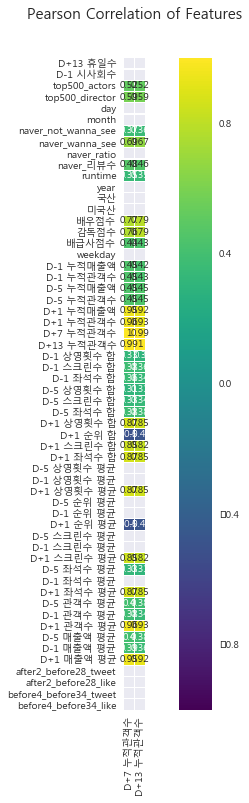

In [159]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df[conti].apply(lambda x: x.map(lambda y: float(y))).corr()[['D+7 누적관객수','D+13 누적관객수']][lambda x: (x>0.3)|(x<-0.3)].astype(float),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

In [160]:
df3 = df
df3 = df3.reset_index()
df3 = df3[lambda x: x['year'] != 2013]
df3 = df3.drop(df3[lambda x: (x['영화명']=='청년경찰')| (x['영화명']=='부산행')| (x['영화명']=='택시운전사')| (x['영화명']=='스물')| (x['영화명']=='군함도')| (x['영화명']=='형')| (x['영화명']=='눈발')| (x['영화명']=='이다')| (x['영화명']=='순정')|(x['영화명']=='두 남자')].index,axis = 0)

In [161]:
df3.corr()['D+7 누적관객수'].sort_values(ascending= False)

D+7 누적관객수                 1.000000
D+13 누적관객수                0.984933
D+1 관객수 평균                0.956575
D+1 누적관객수                 0.956575
D+1 매출액 평균                0.947019
D+1 누적매출액                 0.947019
D+1 좌석수 평균                0.869155
D+1 좌석수 합                 0.869155
D+1 상영횟수 합                0.864480
D+1 상영횟수 평균               0.864480
D+1 스크린수 평균               0.841492
D+1 스크린수 합                0.841492
배우점수                      0.761638
감독점수                      0.750156
naver_wanna_see           0.642625
top500_director           0.593670
top500_actors             0.542039
배급사점수                     0.438050
naver_리뷰수                 0.399305
D-1 누적매출액                 0.390974
D-1 누적관객수                 0.385103
영화구분                      0.375940
D-5 매출액 평균                0.364822
runtime                   0.357406
D-5 관객수 평균                0.352090
D-1 매출액 평균                0.326685
D-5 누적매출액                 0.324109
D-5 누적관객수                 0.315885
D-1 스크린수 합          

In [162]:
df3.iloc[:300].corr()['D+7 누적관객수'].sort_values(ascending= False)

D+7 누적관객수                 1.000000
D+13 누적관객수                0.975520
D+1 누적관객수                 0.924316
D+1 관객수 평균                0.924316
D+1 누적매출액                 0.907920
D+1 매출액 평균                0.907920
D+1 상영횟수 합                0.790082
D+1 상영횟수 평균               0.790082
D+1 스크린수 합                0.789967
D+1 스크린수 평균               0.789967
D+1 좌석수 평균                0.778789
D+1 좌석수 합                 0.778789
배우점수                      0.715811
감독점수                      0.712823
naver_wanna_see           0.515422
top500_director           0.450906
runtime                   0.431112
top500_actors             0.392025
D-1 누적매출액                 0.244338
D-1 누적관객수                 0.238602
naver_리뷰수                 0.223857
naver_not_wanna_see       0.223686
D-1 매출액 평균                0.197976
배급사점수                     0.190584
D-1 관객수 평균                0.181767
D-1 스크린수 합                0.169810
D-1 좌석수 합                 0.164400
영화구분                      0.162813
D-5 누적매출액           

In [163]:
df3.iloc[:100].corr()['D+7 누적관객수'].sort_values(ascending= False)

D+7 누적관객수                 1.000000
D+13 누적관객수                0.950230
D+1 관객수 평균                0.891086
D+1 누적관객수                 0.891086
D+1 매출액 평균                0.860428
D+1 누적매출액                 0.860428
D+1 상영횟수 합                0.666255
D+1 상영횟수 평균               0.666255
D+1 스크린수 평균               0.654663
D+1 스크린수 합                0.654663
D+1 좌석수 평균                0.649314
D+1 좌석수 합                 0.649314
배우점수                      0.648897
감독점수                      0.510365
naver_wanna_see           0.504639
naver_not_wanna_see       0.420479
runtime                   0.401747
naver_리뷰수                 0.320454
배급사점수                     0.290989
영화구분                      0.244383
국산                        0.231177
D-5 관객수 평균                0.136044
D-5 매출액 평균                0.118055
D-5 좌석수 평균                0.109479
before4_before34_like     0.105430
D-5 누적관객수                 0.099247
after2_before28_like      0.099122
D-5 상영횟수 평균               0.096389
D-5 누적매출액           

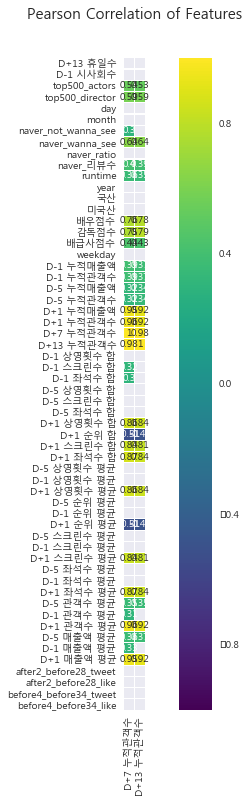

In [164]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df3[conti].apply(lambda x: x.map(lambda y: float(y))).corr()[['D+7 누적관객수','D+13 누적관객수']][lambda x: (x>0.3)|(x<-0.3)].astype(float),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

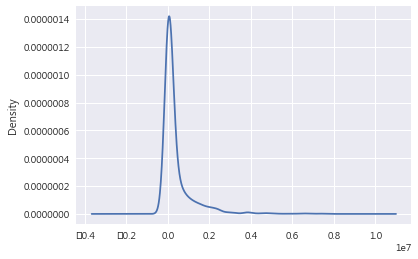

In [165]:
df['D+7 누적관객수'].plot.kde()

In [72]:
half_cat = ['D+13 휴일수','D-1 시사회수','day','month','year','국산','미국산']

In [73]:
df2 = df3.iloc[:500].fillna(0)


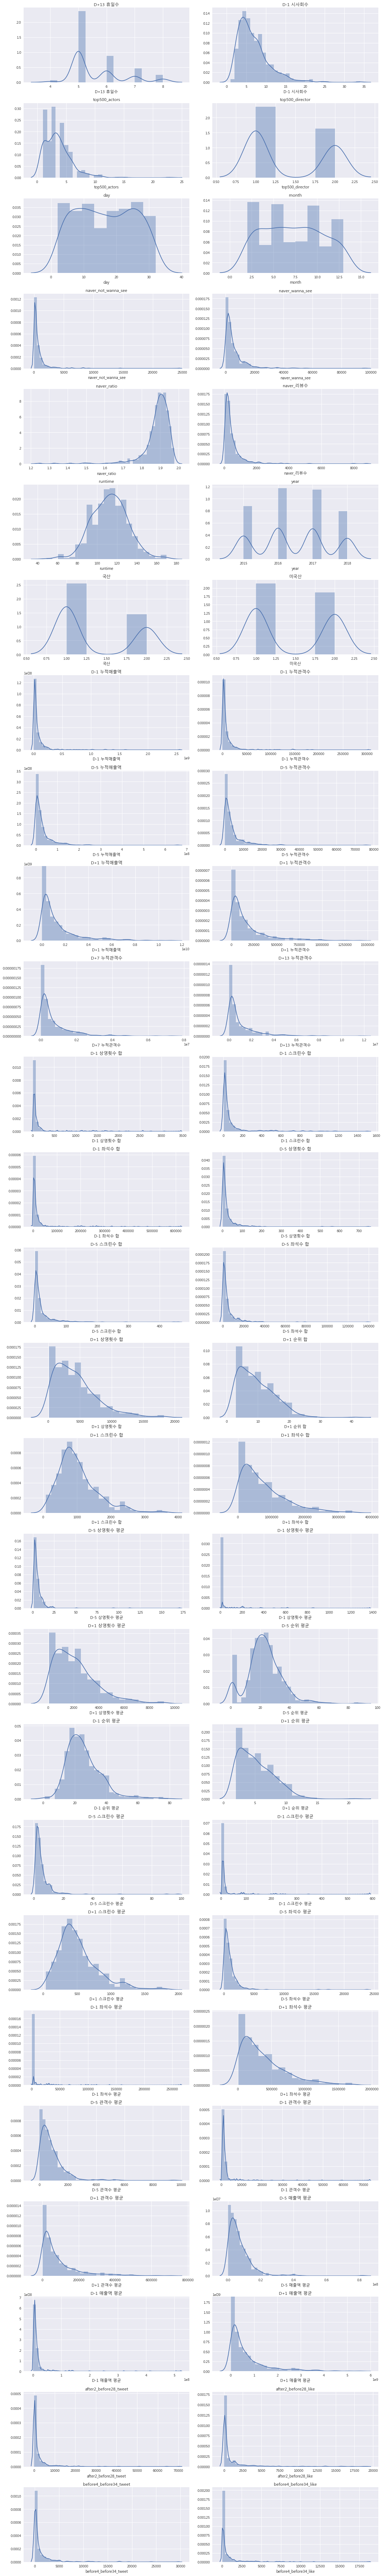

In [74]:
figure, axes = plt.subplots(27, 2,figsize = (15,100))
# x ... 0 ~ 1
for index in range(len(conti)): #0~56
    column = conti[index]
    x = (df2[column]+1)
# plt.plot
    sns.distplot(x,ax=axes[index//2, index-((index//2)*2)])
    axes[index//2, index-((index//2)*2)].set_title(column)
figure.tight_layout()
# plt.title
# plt.xlim
# plt.xrange ... 

# ax.set_title(...)
# ax.get_title

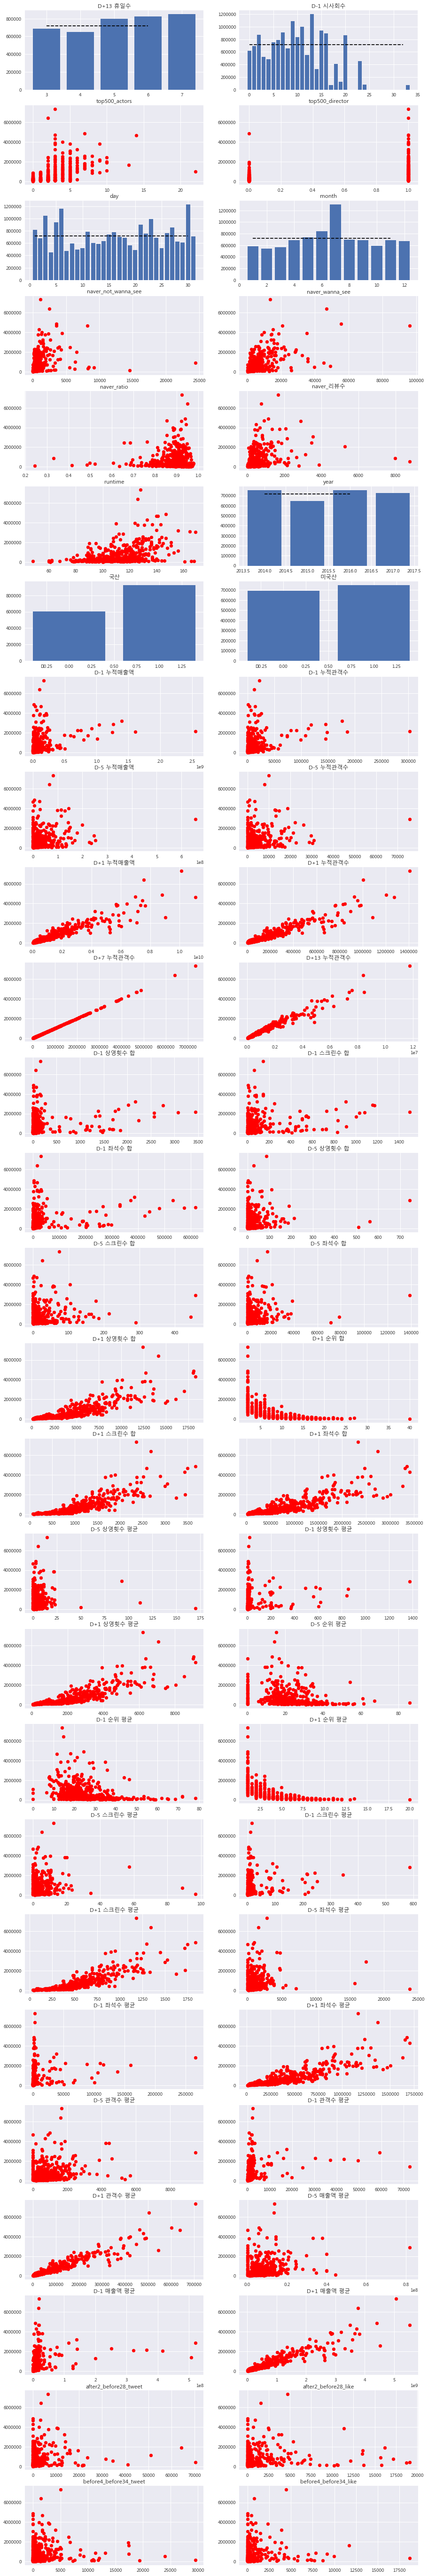

In [75]:
figure, axes = plt.subplots(27, 2,figsize = (15,100))
# x ... 0 ~ 1
for index in range(len(conti)): #0~56
    column = conti[index]
    x = df2[column]
    y = df2['D+7 누적관객수']
# plt.plot
    if column in half_cat:
        x= df2.groupby(column)['D+7 누적관객수'].mean().index
        y = df2.groupby(column)['D+7 누적관객수'].mean()
        axes[index//2, index-((index//2)*2)].plot(np.arange(x.min(),x.max()),np.array([df2['D+7 누적관객수'].mean() for x in np.arange(x.min(),x.max())]),'k--')
        axes[index//2, index-((index//2)*2)].bar(x, y)
        axes[index//2, index-((index//2)*2)].set_title(column)
    else:
        axes[index//2, index-((index//2)*2)].scatter(x, y, c = 'r')
        axes[index//2, index-((index//2)*2)].set_title(column)
# plt.title
# plt.xlim
# plt.xrange ... 

# ax.set_title(...)
# ax.get_title

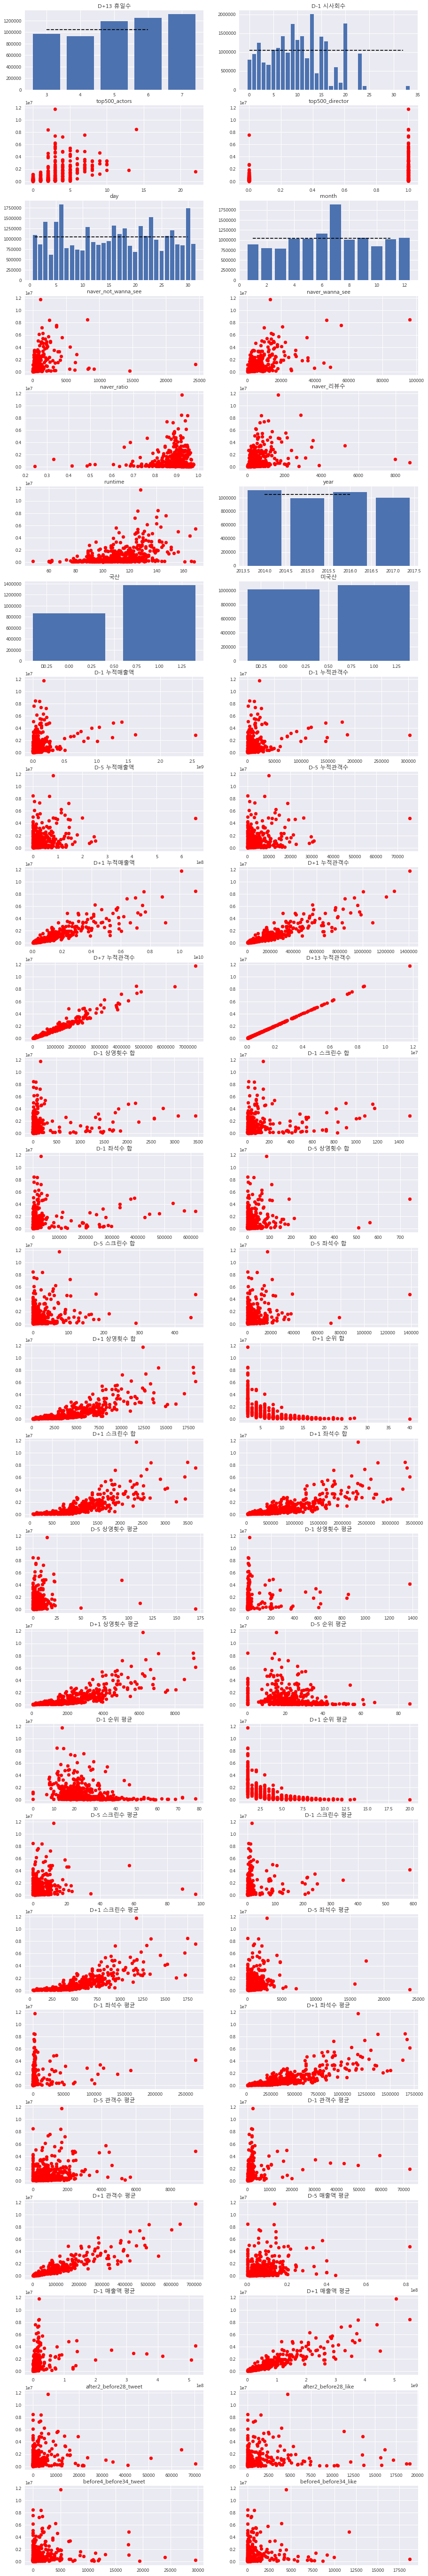

In [76]:
figure, axes = plt.subplots(27, 2,figsize = (15,100))
# x ... 0 ~ 1
for index in range(len(conti)): #0~56
    column = conti[index]
    x = df2[column]
    y = df2['D+13 누적관객수']
# plt.plot
    if column in half_cat:
        x= df2.groupby(column)['D+13 누적관객수'].mean().index
        y = df2.groupby(column)['D+13 누적관객수'].mean()
        axes[index//2, index-((index//2)*2)].plot(np.arange(x.min(),x.max()),np.array([df2['D+13 누적관객수'].mean() for x in np.arange(x.min(),x.max())]),'k--')
        axes[index//2, index-((index//2)*2)].bar(x, y)
        axes[index//2, index-((index//2)*2)].set_title(column)
    else:
        axes[index//2, index-((index//2)*2)].scatter(x, y, c = 'r')
        axes[index//2, index-((index//2)*2)].set_title(column)
# plt.title
# plt.xlim
# plt.xrange ... 

# ax.set_title(...)
# ax.get_title

In [49]:
df.to_csv("movie_eda.csv")